### Problem
<br>
This notebook goes through the metrics techniques used for regression models.
<br>
<br>
The metrics covered are:

<br>

* R2 Score
* Mean Squared Error (MSE)
* Mean Absolute Error (MAE)
<br>

<br>

This notebook will use the following models:


* Decision Trees
* Random Forest
* Adaptive Boosting
* Logistic Regression
* Linear Regression

<br>

Reminder 1 <br>
Decision Trees, Random Forests and Adaptvie Boosting can be used for both regression and classification problems. Logistic Regression can only be used for classification and Linear Regression only for regression problems.

<br>

Reminder 2 <br> 
SST(Sum Square Total), SSR(Sum Square Regression) and SSE(Sum Square Error) relation :

<br> 

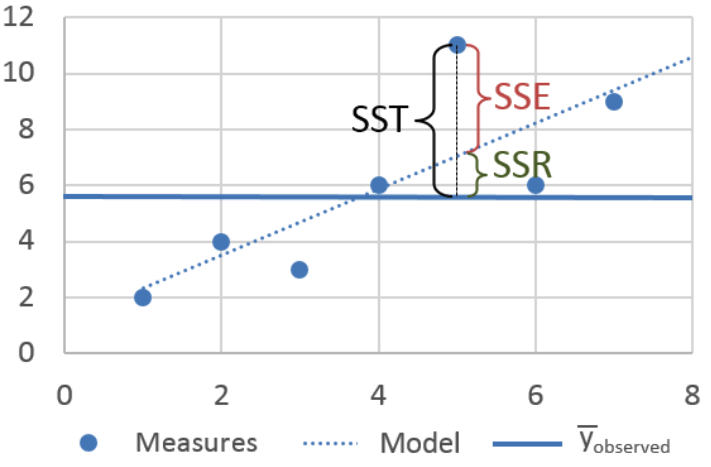

<br>

Reminder 3 <br> 
Mean Absolute Error (MAE) measures the avarage magnitude of the erros in a set of predictions, 
without considering their direction.

<br>

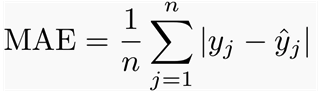

<br>

Reminder 4 <br>
Mean Squared Error (MSE) measures the error magnitude just like MAE. Here we have the erros being squared, making larger erros to stand out compared to minor ones.

### Import

In [36]:
# General import
import numpy as np
# Dataset import
from sklearn.datasets import load_boston
# Models import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# Metrics import
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


### Load dataset and preprocessing

In [34]:
# Load Boston dataset
dataset = load_boston()

X = dataset.data
y = dataset.target

# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### Models

In [35]:
# instantiate models
tree_mod = DecisionTreeRegressor()
rf_mod = RandomForestRegressor(n_estimators=10)
ada_mod = AdaBoostRegressor()
reg_mod = LinearRegression()

# Fit models
tree_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
ada_mod.fit(X_train, y_train)
reg_mod.fit(X_train, y_train)

# Model predictions
tree_preds = tree_mod.predict(X_test)
rf_preds = rf_mod.predict(X_test)
ada_preds = ada_mod.predict(X_test)
reg_preds = reg_mod.predict(X_test)

### Metrics Methods - Custom implementation

In [60]:
# Calculates R2 conefficient of determination/regression score function
def r2(actual, preds):
    sse = np.sum((actual-preds)**2)
    sst = np.sum((actual-np.mean(actual))**2)
    return 1 - (sse/sst)

# Calculates MSE (Mean Squared Error) score
def mse(actual, preds):
    return np.sum((actual-preds)**2)/len(actual)

# Calculates MAE (Mean Absolute Error) score
def mae(actual, preds):
    return np.sum(np.abs(actual-preds))/len(actual)
    

In [61]:
print(mae(y_test, tree_preds))
print(mean_absolute_error(y_test, tree_preds))

2.8808383233532937
2.8808383233532937
